# Reconocimiento de Actas electorales mediante tecnicas OCR usando ConvNeXT

**Nombre:** Brayan Simpon Polo Orellana

**GitHub:** https://github.com/bspoloo/SIS421-022025/tree/main/Laboratorios/Laboratorio%201/ConvNeXT

En este laboratorio sobre una Red neuronal convolucional para la clasificación de imágenes mediante Trasnfer learning, aplicando fine tunning y freezeando la ultima capa de un modelo preentrenado.

## Que es ConvNeXT

ConvNeXt es una arquitectura de visión por computadora (CNN) desarrollada por Facebook AI en 2022.
La idea fue modernizar las CNNs clásicas (ResNet) con mejoras inspiradas en los Transformers (ViT), pero manteniendo solo convoluciones.

¿Qué pasa si actualizamos ResNet con las técnicas modernas de Transformers, pero sin usar auto-atención?

ConvNeXT es una arquitectura de red neuronal convolucional moderna, inspirada en los Transformers, pero usando convoluciones. Su objetivo es cerrar la brecha de desempeño entre CNNs y Transformers en visión, manteniendo la eficiencia computacional de las CNNs. ConvNeXT Tiny es la versión más pequeña, adecuada para datasets medianos o pruebas rápidas.

**Detalles Clave de ConvNeXT**

- Depthwise Convolutions (k=7x7): Reemplazan self-attention de ViT, capturando contexto global eficientemente.

- Inversión de Bottleneck: Primero expande canales (x4) y luego reduce, contrario a ResNet.

- LayerNorm (LN): Usado en lugar de BatchNorm, crucial para estabilidad.

- GELU vs ReLU: Mejor rendimiento en tareas complejas.

- Residual Connections: Como en ResNet, facilitan el entrenamiento profundo.

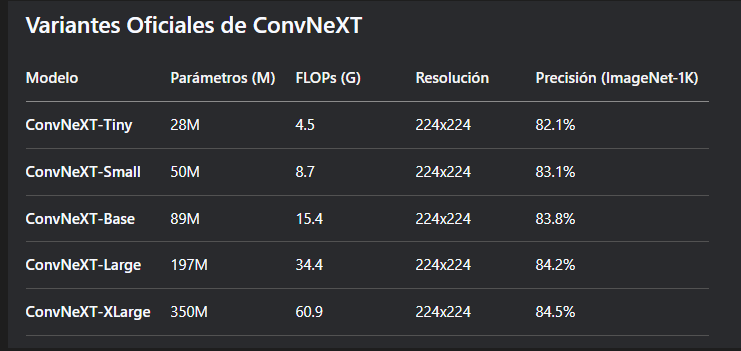

**¿Por qué ConvNeXT es poderoso?**

- Eficiencia: Más rápido que ViT en entrenamiento (sin self-attention costosa).
- Precisión: Supera a ResNet y Swin Transformers en ImageNet.
- Simplicidad: Solo usa convoluciones, evitando complejidad de Transformers.

**Principios clave:**

- Usa bloques de convolución 2D modernos.
- Reemplaza algunas operaciones clásicas de CNN por LayerNorm, Depthwise Convolutions, y residual connections inspiradas en Transformers.
- Mantiene la eficiencia para entrenar en GPU estándar.

<img src="./images/ConvNeXT architecture.png" alt="ConvNeXT Architecture" width="20%" />

### 1. Input Image (224x224x3)
Entrada: Una imagen RGB de tamaño 224x224 píxeles con 3 canales (rojo, verde, azul).

### 2. Stem (Conv 4x4, stride 4)
Objetivo: Reemplaza el patch embedding de los Vision Transformers (ViT) con una convolución tradicional.

**Operación:**

- Aplica una convolución 4x4 con stride=4 (deslizamiento de 4 píxeles).
- Salida: Reduce la resolución espacial y extrae características iniciales.
- Tamaño de salida: 56x56x96 (96 canales de características).

### 3. Etapas (Stages 1-4)
Cada etapa reduce la resolución espacial y aumenta los canales, similar a ResNet pero con bloques modernizados.

**Stage 1 (56x56x96 → 28x28x192)**
Bloque ConvNeXT:

- **Depthwise Convolution (Conv 7x7, grupos=canales):** Captura información espacial como en los ViT.

- **LayerNorm (LN):** Normaliza por canal (mejor que BatchNorm para batches pequeños).

- **Conv 1x1 (Expansión):** Aumenta canales temporalmente (ej: de 96 a 384).

- **GELU Activation:** Función de activación no lineal. (Gaussian Error Linear Unit)

- **Conv 1x1 (Reducción):** Vuelve a los canales originales (192 en Stage 1).

- **Conexión Residual:** Suma la entrada original (como en ResNet).

- **Downsample:** Reducción de resolución a 28x28 (usando LayerNorm + Conv 2x2, stride=2).

**Stage 2 (28x28x192 → 14x14x384)**
- Misma estructura, pero con más canales (384). La resolución se reduce a 14x14.

**Stage 3 (14x14x384 → 7x7x768)**
- Aumenta canales a 768 y reduce resolución a 7x7.

**Stage 4 (7x7x768 → 768)**
- Última etapa sin reducción espacial. Las características se mantienen en 768 canales.

### 4. Global Average Pooling (GAP)
Reduce cada canal 7x7 a un solo valor promedio.

Entrada: 7x7x768 → Salida: 1x1x768.

### 5. LayerNorm
Normalización final para estabilizar los valores antes de la clasificación.

### 6. Fully Connected (Linear Layer)
Capa lineal que mapea los 768 canales a num_classes (ej: 1000 clases en ImageNet).

**Salida:** Logits (puntuaciones para cada clase).

## PipeLine de prediccion del numero
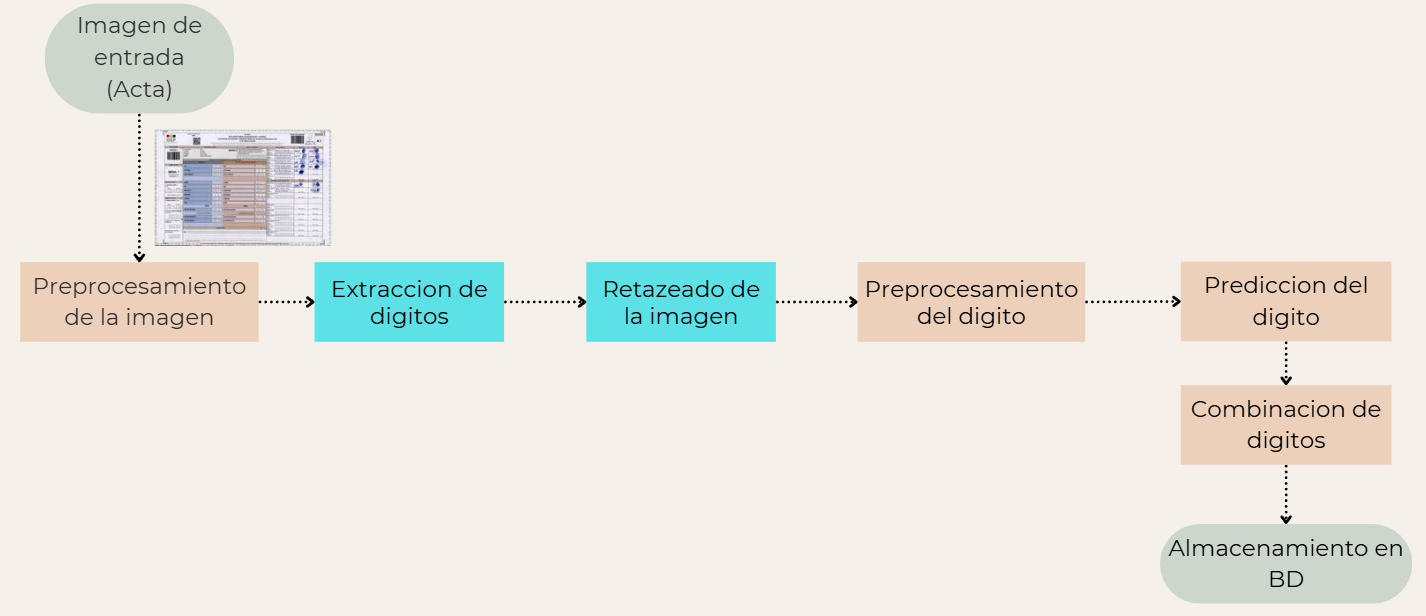

## Entrenamiento del Modelo

- **Optimizador:** Adam  
- **Función de pérdida:** CrossEntropyLoss
- **Épocas de entrenamiento:** 15
- **Batch size:** 64

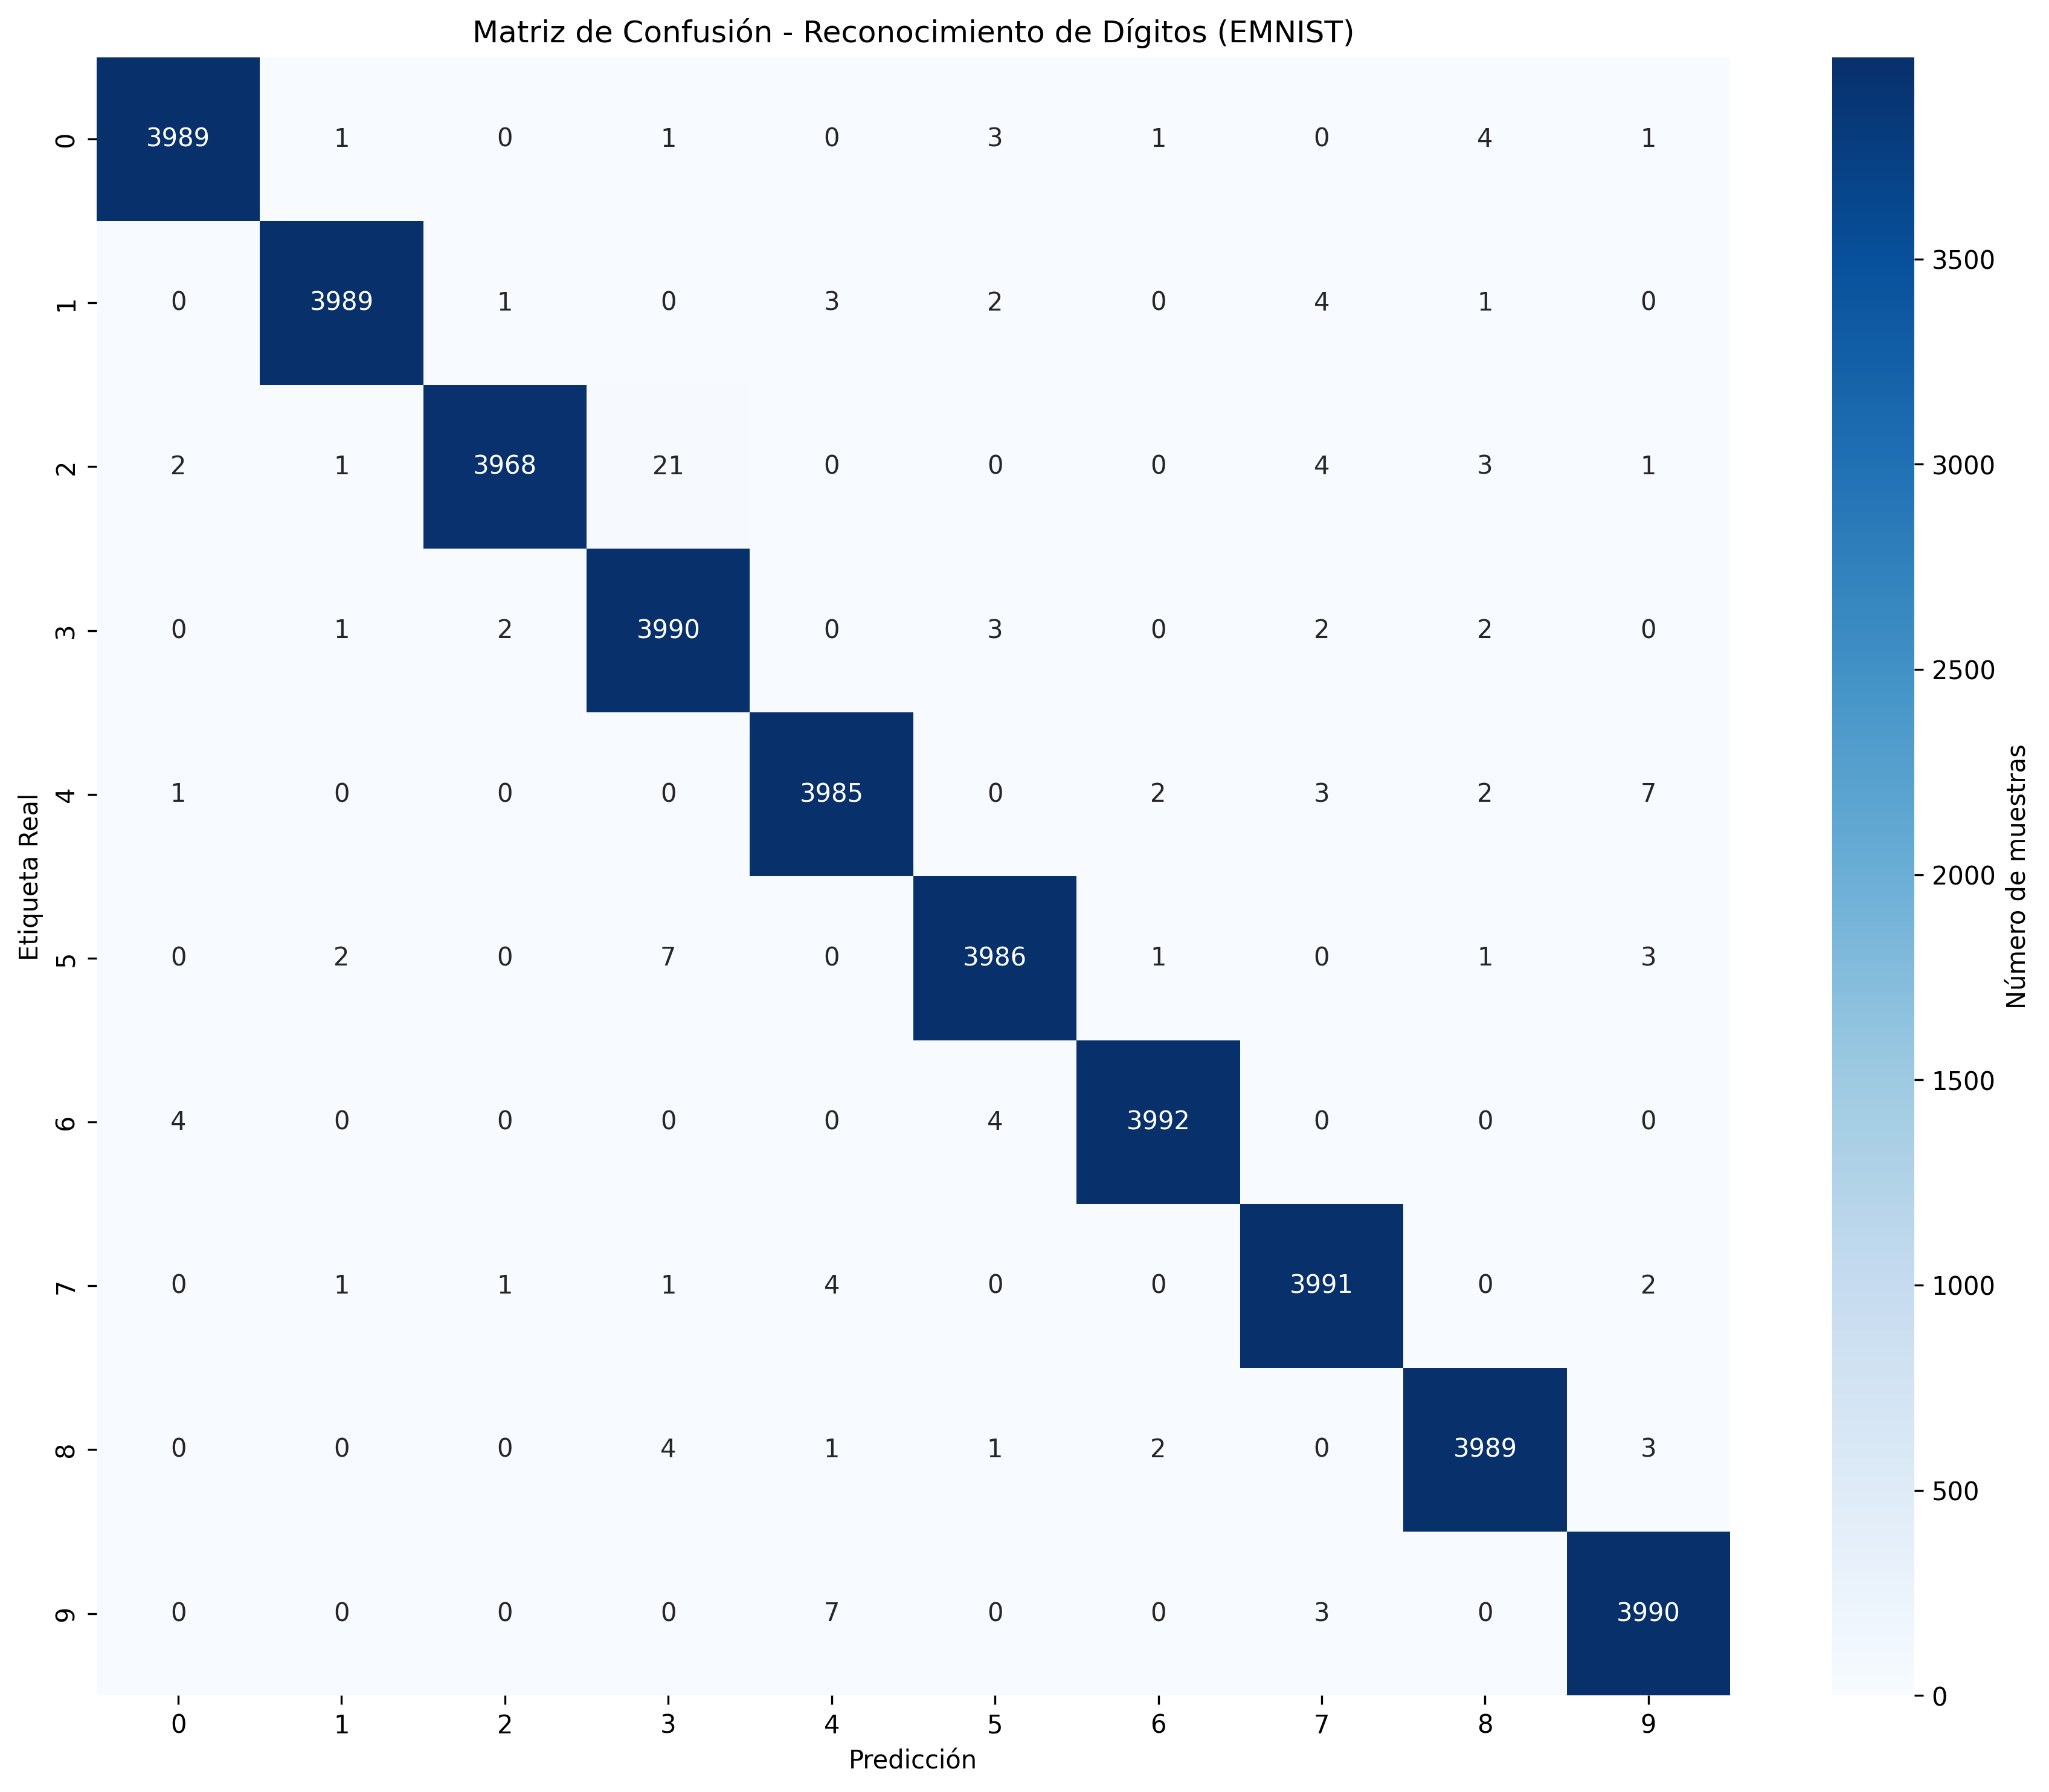

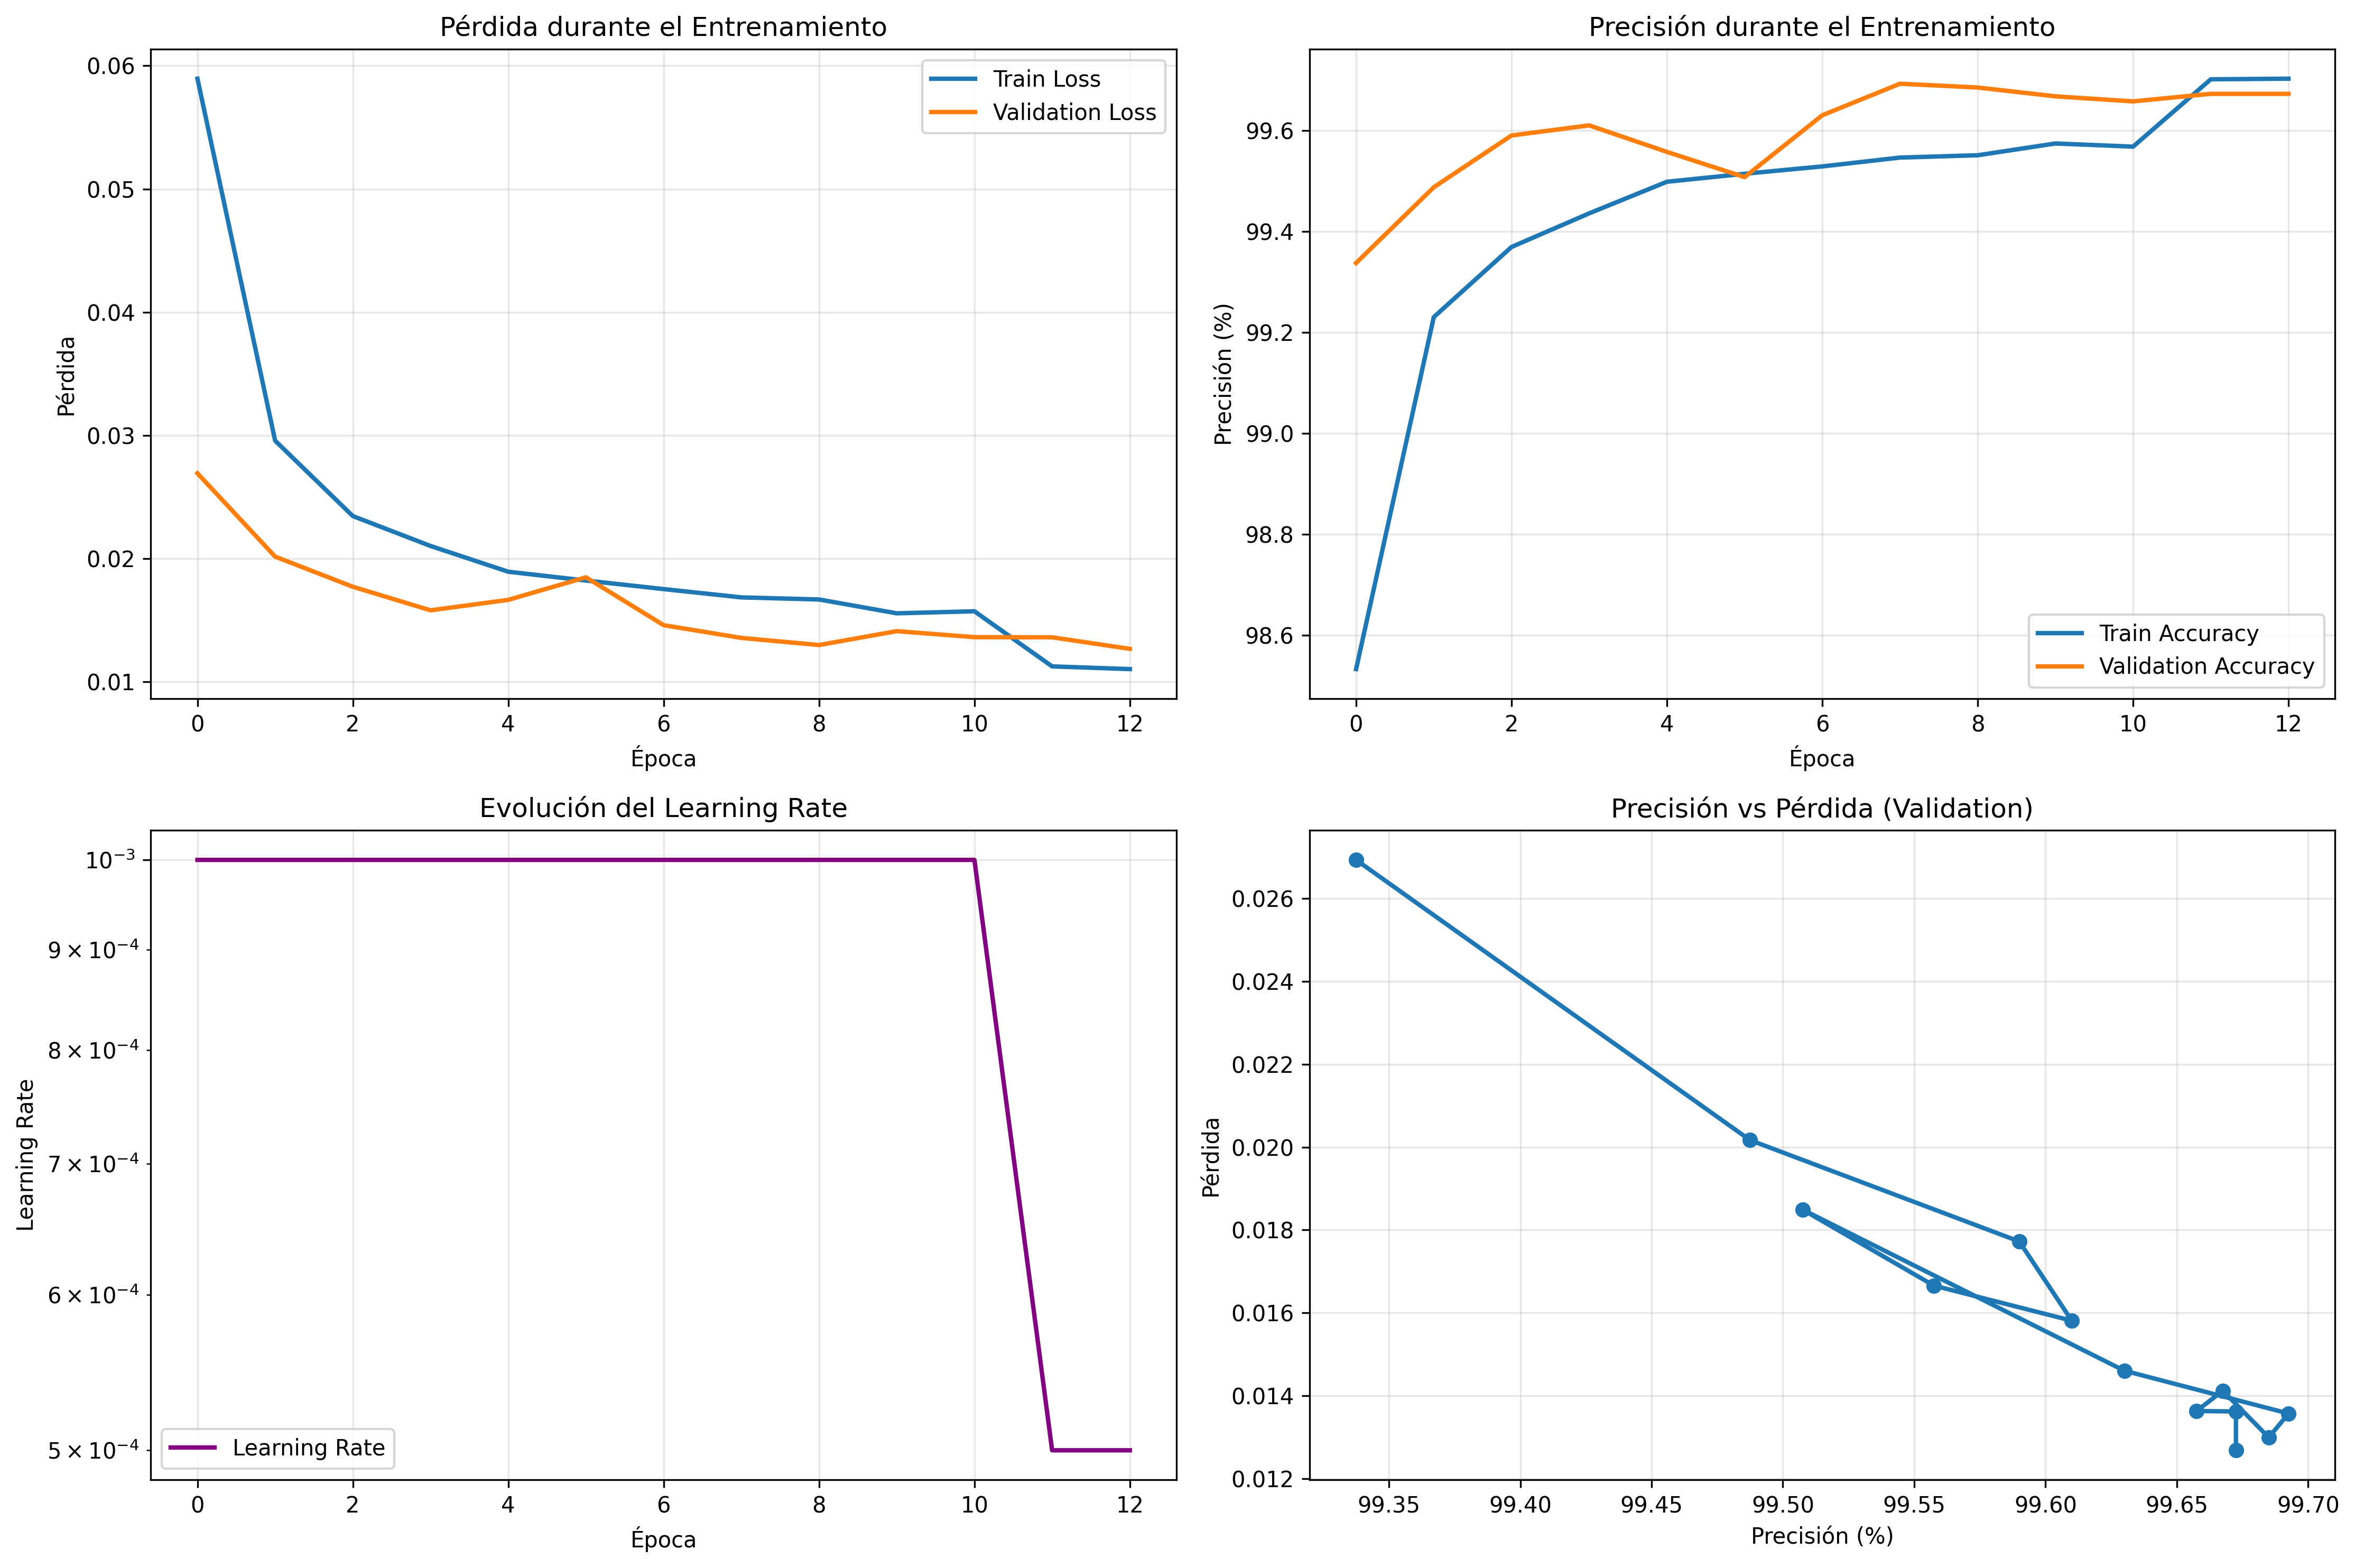

- **Precisión en entrenamiento:** 99.7025%
- **Precisión en validación:** 99.6725
- **Recall:** 0.996725
- **F1_score:** 0.9967253763614253